In [ ]:
!pip install mealpy
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import Conv2D,Input,MaxPooling2D,Flatten,Dense,Activation,Dropout
from mealpy import FloatVar, GOA

from tensorflow.keras.optimizers import Adam,RMSprop

from tensorflow.keras.models import Model,Sequential

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.7 MB/s eta 0:00:00


In [ ]:
pip install mealpy --upgrade

In [ ]:
from mealpy import FloatVar, GOA

In [ ]:
import os
import shutil

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

#from torchmetrics import Accuracy, ConfusionMatrix, Precision, Recall, F1Score

from tqdm import tqdm
import glob
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

data_dir = '/content/drive/MyDrive/'



In [ ]:
data_dir1=["E6063_processed","E6063_processed_2","E6063_processed_3","E6063_processed_4"]

In [ ]:
training=pd.read_csv("/content/drive/MyDrive/sample_df.csv",index_col=[0])

In [ ]:
training

,Image name,Retinopathy grade
0,20051216_43814_0200_PP.tif.jpg,0
1,20051216_43913_0200_PP.tif.jpg,0
2,20051216_44066_0200_PP.tif.jpg,0
3,20051216_44092_0200_PP.tif.jpg,0
4,20051216_44221_0200_PP.tif.jpg,0
...,...,...
395,20060412_62960_0200_PP.tif.jpg,3
396,20060412_63009_0200_PP.tif.jpg,1
397,20060412_63032_0200_PP.tif.jpg,1
398,20060412_63088_0200_PP.tif.jpg,1


In [ ]:
tensor=[]
input_tensor2=[]
for data in data_dir1:
  for x in sorted(os.listdir(data_dir+data)):
  #     path_img = os.path.join(folder_path,x)
  #     img = plt.imread(path_img)
  #     img_enhanced = mc.mclahe(img[:,:,1])
  #     img_enhanced = img_enhanced*255
  #     img_enhanced = img_enhanced.astype('uint8')
  # #     if temp_c==0:
  # #         print(img_enhanced[1500][1500])
  # #     temp_c = temp_c + 1
  #     img_feat = get_glrlm_features(img_enhanced)
  #     feat_list_a_test.append(img_feat)

        path_img = os.path.join((data_dir+data),x)


        img = tf.io.read_file(path_img)
        tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
        tensor = tf.image.resize(tensor,[100, 100])
        #input_tensor = tf.expand_dims(tensor, axis=0)
        input_tensor2.append(tensor)

In [ ]:
input_tensor2=np.array(input_tensor2)

In [ ]:
input_tensor2.shape

(400, 100, 100, 3)

In [ ]:
print(sorted(os.listdir(data_dir+data_dir1[1])))

['20060407_44766_0200_PP.tif.jpg', '20060407_44866_0200_PP.tif.jpg', '20060407_44889_0200_PP.tif.jpg', '20060407_45087_0200_PP.tif.jpg', '20060407_45107_0200_PP.tif.jpg', '20060407_45230_0200_PP.tif.jpg', '20060407_45247_0200_PP.tif.jpg', '20060407_45362_0200_PP.tif.jpg', '20060407_45379_0200_PP.tif.jpg', '20060407_45477_0200_PP.tif.jpg', '20060407_45494_0200_PP.tif.jpg', '20060407_45592_0200_PP.tif.jpg', '20060407_45611_0200_PP.tif.jpg', '20060407_45718_0200_PP.tif.jpg', '20060407_45737_0200_PP.tif.jpg', '20060407_45834_0200_PP.tif.jpg', '20060407_45852_0200_PP.tif.jpg', '20060407_45932_0200_PP.tif.jpg', '20060407_45949_0200_PP.tif.jpg', '20060407_46050_0200_PP.tif.jpg', '20060407_46070_0200_PP.tif.jpg', '20060407_46235_0200_PP.tif.jpg', '20060407_46257_0200_PP.tif.jpg', '20060407_46394_0200_PP.tif.jpg', '20060407_46422_0200_PP.tif.jpg', '20060410_39047_0200_PP.tif.jpg', '20060410_39075_0200_PP.tif.jpg', '20060410_39203_0200_PP.tif.jpg', '20060410_39229_0200_PP.tif.jpg', '20060410_393

In [ ]:
input_tensor2=np.array(input_tensor2)

In [ ]:
training=pd.read_csv("/content/drive/MyDrive/final_df.csv")

In [ ]:
training

,Unnamed: 0,Image name,Retinopathy grade
0,0,/content/drive/MyDrive/E6063_processed/2005121...,0
1,1,/content/drive/MyDrive/E6063_processed/2005121...,0
2,2,/content/drive/MyDrive/E6063_processed/2005121...,0
3,3,/content/drive/MyDrive/E6063_processed/2005121...,0
4,4,/content/drive/MyDrive/E6063_processed/2005121...,0
...,...,...,...
395,395,/content/drive/MyDrive/E6063_processed_4/20060...,3
396,396,/content/drive/MyDrive/E6063_processed_4/20060...,1
397,397,/content/drive/MyDrive/E6063_processed_4/20060...,1
398,398,/content/drive/MyDrive/E6063_processed_4/20060...,1


In [ ]:
training['Retinopathy grade'].unique()

array([0, 2, 1, 3])

In [ ]:
training

,Unnamed: 0,Image name,Retinopathy grade
0,0,/content/drive/MyDrive/E6063_processed/2005121...,0
1,1,/content/drive/MyDrive/E6063_processed/2005121...,0
2,2,/content/drive/MyDrive/E6063_processed/2005121...,0
3,3,/content/drive/MyDrive/E6063_processed/2005121...,0
4,4,/content/drive/MyDrive/E6063_processed/2005121...,0
...,...,...,...
395,395,/content/drive/MyDrive/E6063_processed_4/20060...,3
396,396,/content/drive/MyDrive/E6063_processed_4/20060...,1
397,397,/content/drive/MyDrive/E6063_processed_4/20060...,1
398,398,/content/drive/MyDrive/E6063_processed_4/20060...,1


In [ ]:
X=training.loc[:,'Image name']
y=training.loc[:,'Retinopathy grade']

In [ ]:
X

0      20051216_43814_0200_PP.tif.jpg
1      20051216_43913_0200_PP.tif.jpg
2      20051216_44066_0200_PP.tif.jpg
3      20051216_44092_0200_PP.tif.jpg
4      20051216_44221_0200_PP.tif.jpg
                    ...              
395    20060412_62960_0200_PP.tif.jpg
396    20060412_63009_0200_PP.tif.jpg
397    20060412_63032_0200_PP.tif.jpg
398    20060412_63088_0200_PP.tif.jpg
399    20060412_63104_0200_PP.tif.jpg
Name: Image name, Length: 400, dtype: object

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    3
396    1
397    1
398    1
399    1
Name: Retinopathy grade, Length: 400, dtype: int64

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.1, random_state = 27, stratify=y)


In [ ]:
val_x

28     /content/drive/MyDrive/E6063_processed/2005121...
283    /content/drive/MyDrive/E6063_processed_3/20060...
387    /content/drive/MyDrive/E6063_processed_4/20060...
299    /content/drive/MyDrive/E6063_processed_3/20060...
220    /content/drive/MyDrive/E6063_processed_3/20060...
370    /content/drive/MyDrive/E6063_processed_4/20060...
166    /content/drive/MyDrive/E6063_processed_2/20060...
19     /content/drive/MyDrive/E6063_processed/2005121...
201    /content/drive/MyDrive/E6063_processed_3/20060...
4      /content/drive/MyDrive/E6063_processed/2005121...
329    /content/drive/MyDrive/E6063_processed_4/20060...
163    /content/drive/MyDrive/E6063_processed_2/20060...
22     /content/drive/MyDrive/E6063_processed/2005121...
207    /content/drive/MyDrive/E6063_processed_3/20060...
224    /content/drive/MyDrive/E6063_processed_3/20060...
236    /content/drive/MyDrive/E6063_processed_3/20060...
344    /content/drive/MyDrive/E6063_processed_4/20060...
2      /content/drive/MyDrive/E

In [ ]:
train_x

340    20060412_58869_0200_PP.tif
230    20060411_59190_0200_PP.tif
249    20060411_60511_0200_PP.tif
396    20060412_63009_0200_PP.tif
363    20060412_60475_0200_PP.tif
                  ...            
194    20060410_47186_0200_PP.tif
133    20060410_39586_0200_PP.tif
180    20060410_44504_0200_PP.tif
48     20060407_39184_0200_PP.tif
183    20060410_44770_0200_PP.tif
Name: Image name, Length: 360, dtype: object

In [ ]:
df_train = pd.DataFrame(columns=['image_names','Retinopathy_grade'])
df_train['image_names'] = train_x
df_train['Retinopathy_grade'] = train_y

In [ ]:
train_y.unique()

array([3, 2, 0, 1])

In [ ]:
df_train

,image_names,Retinopathy_grade
340,/content/drive/MyDrive/E6063_processed_4/20060...,3
230,/content/drive/MyDrive/E6063_processed_3/20060...,2
249,/content/drive/MyDrive/E6063_processed_3/20060...,0
396,/content/drive/MyDrive/E6063_processed_4/20060...,1
363,/content/drive/MyDrive/E6063_processed_4/20060...,1
...,...,...
194,/content/drive/MyDrive/E6063_processed_2/20060...,0
133,/content/drive/MyDrive/E6063_processed_2/20060...,0
180,/content/drive/MyDrive/E6063_processed_2/20060...,0
48,/content/drive/MyDrive/E6063_processed/2006040...,0


In [ ]:
df_valid= pd.DataFrame(columns=['image_names','Retinopathy_grade'])
df_valid['image_names'] = val_x
df_valid['Retinopathy_grade'] = val_y

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_valid.reset_index(drop=True, inplace=True)

In [ ]:
df_train

,image_names,Retinopathy_grade
0,/content/drive/MyDrive/E6063_processed_4/20060...,3
1,/content/drive/MyDrive/E6063_processed_3/20060...,2
2,/content/drive/MyDrive/E6063_processed_3/20060...,0
3,/content/drive/MyDrive/E6063_processed_4/20060...,1
4,/content/drive/MyDrive/E6063_processed_4/20060...,1
...,...,...
355,/content/drive/MyDrive/E6063_processed_2/20060...,0
356,/content/drive/MyDrive/E6063_processed_2/20060...,0
357,/content/drive/MyDrive/E6063_processed_2/20060...,0
358,/content/drive/MyDrive/E6063_processed/2006040...,0


In [ ]:
df_train['Retinopathy_grade'].unique()

array([3, 2, 0, 1])

In [ ]:
for i in range(len(df_train)):

    image = df_train.loc[i,'image_names']+".jpg"

    if df_train.loc[i,'Retinopathy_grade'] == 0:
        shutil.copy(image,r"/content/drive/MyDrive/Images/train_images/0" )
    if df_train.loc[i,'Retinopathy_grade'] == 1:
        shutil.copy( image,r"/content/drive/MyDrive/Images/train_images/1")
    if df_train.loc[i,'Retinopathy_grade'] == 2:
        shutil.copy( image,r"/content/drive/MyDrive/Images/train_images/2")
    else:
        shutil.copy( image,r"/content/drive/MyDrive/Images/train_images/3")

In [ ]:
for i in range(len(df_valid)):

    image = df_valid.loc[i,'image_names']+".jpg"

    if df_valid.loc[i,'Retinopathy_grade'] == 0:
        shutil.copy(image,r"/content/drive/MyDrive/Images/validation_images/0" )
    if df_valid.loc[i,'Retinopathy_grade'] == 1:
        shutil.copy( image,r"/content/drive/MyDrive/Images/validation_images/1")
    if df_valid.loc[i,'Retinopathy_grade'] == 2:
        shutil.copy( image,r"/content/drive/MyDrive/Images/validation_images/2")
    else:
        shutil.copy( image,r"/content/drive/MyDrive/Images/validation_images/3")

In [ ]:
df_valid['Retinopathy_grade'].unique()

array([0, 2, 1, 3])

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/E3063 dataset/Annotation_Base21.xls')
df2= pd.read_excel('/content/drive/MyDrive/E3063 dataset/Annotation_Base22.xls')
df3= pd.read_excel('/content/drive/MyDrive/E3063 dataset/Annotation_Base23.xls')
df4=pd.read_excel('/content/drive/MyDrive/E3063 dataset/Annotation_Base24.xls')

In [ ]:
df

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
0,20051216_43814_0200_PP.tif,CHU de St Etienne,0,0
1,20051216_43913_0200_PP.tif,CHU de St Etienne,0,0
2,20051216_44066_0200_PP.tif,CHU de St Etienne,0,0
3,20051216_44092_0200_PP.tif,CHU de St Etienne,0,0
4,20051216_44221_0200_PP.tif,CHU de St Etienne,0,0
...,...,...,...,...
95,20060407_44510_0200_PP.tif,CHU de St Etienne,0,0
96,20060407_44529_0200_PP.tif,CHU de St Etienne,0,0
97,20060407_44617_0200_PP.tif,CHU de St Etienne,3,2
98,20060407_44636_0200_PP.tif,CHU de St Etienne,3,2


In [ ]:
train_dir=r"/content/drive/MyDrive/Images/train_images/"
validation_dir=r"/content/drive/MyDrive/Images/validation_images"

In [ ]:
def create_mobilenet():
    model = Sequential()

    # Initial Convolution Layer
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(100,100,3)))
    model.add(BatchNormalization())
    model.add(ReLU())

    # Depthwise Separable Convolution Blocks
    model.add(DepthwiseConv2D((3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(64, (1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(128, (1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(DepthwiseConv2D((3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(128, (1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    # Global Average Pooling and Fully Connected Layers
    model.add(GlobalAveragePooling2D())
    model.add(Dense(4, activation='softmax'))  # Output with 1000 classes

    return model

# Create the MobileNet-like model
mobile_net_model = create_mobilenet()

# Compile the model
mobile_net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.02, height_shift_range=0.02, shear_range=0.02, zoom_range=0.02, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100, 100), batch_size=32, class_mode='sparse',classes=['0', '1', '2', '3'])
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(100, 100), batch_size=32, class_mode='sparse',classes=['0', '1', '2', '3'])
history = mobile_net_model.fit_generator(train_generator, steps_per_epoch= len(df_train)//32, epochs=25, validation_data=validation_generator, validation_steps=len(df_valid)//32)
#history = mobile_net_model.fit(X_train,y_train, epochs=10,batch_size=32, validation_data=(X_test, y_test))
# You can now use the model for training and inference

NameError: ignored

KFOLD Cross Validation
Over Augumentation

In [ ]:
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold,StratifiedGroupKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.applications import ResNet50,ResNet101
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras import applications

In [ ]:
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold
import gc


In [ ]:
# As we are going to divide dataset
df = training.copy()

In [ ]:
df = df.applymap(str)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Image name,Retinopathy grade
0,20051216_43814_0200_PP.tif.jpg,0
1,20051216_43913_0200_PP.tif.jpg,0
2,20051216_44066_0200_PP.tif.jpg,0
3,20051216_44092_0200_PP.tif.jpg,0
4,20051216_44221_0200_PP.tif.jpg,0
...,...,...
395,20060412_62960_0200_PP.tif.jpg,3
396,20060412_63009_0200_PP.tif.jpg,1
397,20060412_63032_0200_PP.tif.jpg,1
398,20060412_63088_0200_PP.tif.jpg,1


In [ ]:
TRAIN_PATH=r"/content/drive/MyDrive/Retinopathy_training"
VALIDATION_PATH=r"/content/drive/MyDrive/Retinopathy_validation"
IMG_SIZE=224
BATCH_SIZE=1

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense

# Define the MobileNet-like architecture
def create_mobilenet(IMG_SIZE):
    model = Sequential()

    # Initial Convolution Layer
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(IMG_SIZE,IMG_SIZE,3)))
    model.add(BatchNormalization())
    model.add(ReLU())

    # Depthwise Separable Convolution Blocks
    model.add(DepthwiseConv2D((3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(64, (1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(128, (1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(DepthwiseConv2D((3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(128, (1, 1), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    # Global Average Pooling and Fully Connected Layers
    model.add(GlobalAveragePooling2D())
    model.add(Dense(4, activation='softmax'))  # Output with 1000 classes

    return model



In [ ]:
def resnet(IMG_SIZE):
    base_model =applications.ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    add_model = Sequential()
    add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    add_model.add(Dropout(0.3))
    add_model.add(Dense(64, activation='relu'))
    add_model.add(Dropout(0.4))

    add_model.add(Dense(4, activation='softmax'))

    model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=2e-4),
                  metrics=['accuracy'])
    #model.summary()
    return model

In [ ]:
# Create the MobileNet-like model
mobile_net_model = resnet(IMG_SIZE)

# Compile the model
#mobile_net_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
X.shape

(400,)

In [ ]:
y.shape

(400,)

In [ ]:
# Generate synthetic patient IDs (groups) for demonstration
group_labels= np.random.randint(1,6, size=len(y))

In [ ]:
group_labels

array([5, 4, 2, 3, 1, 2, 1, 5, 1, 5, 4, 3, 3, 2, 5, 5, 1, 4, 2, 5, 4, 1,
       5, 4, 1, 3, 5, 2, 3, 4, 4, 3, 4, 1, 2, 3, 4, 2, 1, 4, 1, 3, 3, 1,
       1, 3, 5, 1, 4, 2, 2, 5, 1, 1, 3, 1, 1, 3, 4, 4, 5, 5, 2, 5, 2, 4,
       3, 5, 4, 2, 2, 2, 5, 4, 5, 2, 2, 4, 1, 5, 4, 1, 4, 5, 3, 4, 1, 4,
       5, 5, 3, 4, 3, 5, 1, 4, 1, 3, 2, 4, 2, 5, 3, 5, 1, 3, 2, 3, 5, 2,
       4, 5, 1, 5, 4, 1, 1, 3, 3, 3, 5, 3, 5, 1, 1, 3, 4, 2, 4, 5, 1, 1,
       2, 4, 1, 5, 3, 4, 3, 4, 5, 5, 3, 2, 2, 5, 4, 3, 4, 1, 1, 4, 5, 1,
       3, 2, 1, 1, 3, 1, 5, 2, 4, 4, 4, 4, 4, 5, 5, 5, 4, 2, 1, 2, 2, 5,
       3, 5, 5, 2, 2, 4, 5, 3, 3, 4, 4, 3, 5, 2, 2, 2, 5, 3, 3, 3, 3, 2,
       5, 3, 3, 4, 1, 4, 4, 2, 5, 3, 5, 3, 3, 5, 2, 1, 3, 3, 2, 1, 5, 5,
       1, 2, 2, 3, 5, 2, 3, 3, 1, 3, 4, 4, 4, 1, 5, 3, 2, 1, 3, 4, 3, 1,
       2, 1, 4, 3, 5, 4, 1, 5, 3, 5, 4, 1, 5, 3, 5, 2, 1, 2, 2, 3, 4, 3,
       3, 5, 4, 2, 5, 1, 1, 1, 3, 1, 3, 5, 1, 1, 4, 5, 2, 4, 3, 1, 2, 5,
       3, 2, 1, 2, 5, 2, 3, 3, 4, 2, 2, 2, 4, 3, 4,

In [ ]:
N_SPLIT=5
main_pred = []
data_kfold = pd.DataFrame()
kfold = StratifiedGroupKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)
#groups=np.array(y)
# Variable for keeping count of split we are executing

j = 0

# K-fold Train and test for each split

for fold,(train_idx,val_idx) in enumerate(list(kfold.split(X, y,groups=group_labels))):
    print(f"Fold {fold + 1}:")

    x_train_df = df.iloc[train_idx]
    x_valid_df = df.iloc[val_idx]

    j+=1
    training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df,directory=TRAIN_PATH,

                                                 x_col="Image name", y_col="Retinopathy grade",

                                                 class_mode='categorical',
                                                 classes=['0', '1', '2', '3'],

                                                 target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE
                                                 )

    validation_set = validation_datagen.flow_from_dataframe(dataframe=x_valid_df,directory=TRAIN_PATH,

                                                 x_col="Image name", y_col="Retinopathy grade",

                                                 class_mode='categorical',

                                                 classes=['0', '1', '2', '3'],
                                                 target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE)

    model_test = resnet(IMG_SIZE)
    history = mobile_net_model.fit_generator(training_set, steps_per_epoch= x_train_df.shape[0]//BATCH_SIZE, epochs=25, validation_data=validation_set, validation_steps=x_valid_df.shape[0]//BATCH_SIZE)
    test_generator = ImageDataGenerator(rescale = 1./255)

    test_set = test_generator.flow_from_dataframe(dataframe=training,directory=TRAIN_PATH,

                                                 x_col="Image name",y_col=None,

                                                 class_mode=None,

                                                 classes=['0', '1', '2', '3'],

                                                 target_size=(IMG_SIZE,IMG_SIZE))

    pred= model_test.predict_generator(test_set, len(training) // BATCH_SIZE)

    predicted_class_indices=np.argmax(pred,axis=1)

    data_kfold[j] = predicted_class_indices

    gc.collect()


Fold 1:
Found 323 validated image filenames belonging to 4 classes.
Found 77 validated image filenames belonging to 4 classes.


Epoch 1/25
  1/323 [..............................] - ETA: 28s - loss: 1.3366 - accuracy: 1.0000

<ipython-input-61-ba4cdfaaa5d1>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mobile_net_model.fit_generator(training_set, steps_per_epoch= x_train_df.shape[0]//BATCH_SIZE, epochs=25, validation_data=validation_set, validation_steps=x_valid_df.shape[0]//BATCH_SIZE)


323/323 [==============================] - 22s 68ms/step - loss: 1.3531 - accuracy: 0.4706 - val_loss: 1.3408 - val_accuracy: 0.4416
Epoch 2/25
323/323 [==============================] - 23s 72ms/step - loss: 1.4425 - accuracy: 0.4675 - val_loss: 666871.3125 - val_accuracy: 0.2597
Epoch 3/25
323/323 [==============================] - 21s 65ms/step - loss: 3.0934 - accuracy: 0.4303 - val_loss: 1.3096 - val_accuracy: 0.4416
Epoch 4/25
323/323 [==============================] - 22s 67ms/step - loss: 1.3364 - accuracy: 0.4675 - val_loss: 1.2995 - val_accuracy: 0.4416
Epoch 5/25
323/323 [==============================] - 21s 65ms/step - loss: 1.2848 - accuracy: 0.4706 - val_loss: 1.2920 - val_accuracy: 0.4416
Epoch 6/25
323/323 [==============================] - 22s 69ms/step - loss: 1.3147 - accuracy: 0.4675 - val_loss: 1.2863 - val_accuracy: 0.4416
Epoch 7/25
323/323 [==============================] - 21s 65ms/step - loss: 1.2809 - accuracy: 0.4675 - val_loss: 1.2834 - val_accuracy: 0.441

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1071: UserWarning: `classes` will be ignored given the class_mode="None"
  warnings.warn(
<ipython-input-61-ba4cdfaaa5d1>:52: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(training) // BATCH_SIZE)


Fold 2:
Found 306 validated image filenames belonging to 4 classes.
Found 94 validated image filenames belonging to 4 classes.


Epoch 1/25
  1/306 [..............................] - ETA: 29s - loss: 0.7638 - accuracy: 1.0000

<ipython-input-61-ba4cdfaaa5d1>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mobile_net_model.fit_generator(training_set, steps_per_epoch= x_train_df.shape[0]//BATCH_SIZE, epochs=25, validation_data=validation_set, validation_steps=x_valid_df.shape[0]//BATCH_SIZE)


306/306 [==============================] - 22s 72ms/step - loss: 1.2832 - accuracy: 0.4379 - val_loss: 1.2105 - val_accuracy: 0.5532
Epoch 2/25
306/306 [==============================] - 21s 68ms/step - loss: 1.2823 - accuracy: 0.4379 - val_loss: 1.2137 - val_accuracy: 0.5532
Epoch 3/25
306/306 [==============================] - 22s 71ms/step - loss: 1.2830 - accuracy: 0.4379 - val_loss: 1.2175 - val_accuracy: 0.5532
Epoch 4/25
306/306 [==============================] - 19s 63ms/step - loss: 1.2807 - accuracy: 0.4379 - val_loss: 1.2197 - val_accuracy: 0.5532
Epoch 5/25
306/306 [==============================] - 22s 73ms/step - loss: 1.2803 - accuracy: 0.4379 - val_loss: 1.2209 - val_accuracy: 0.5532
Epoch 6/25
306/306 [==============================] - 21s 67ms/step - loss: 1.2800 - accuracy: 0.4379 - val_loss: 1.2229 - val_accuracy: 0.5532
Epoch 7/25
306/306 [==============================] - 21s 68ms/step - loss: 1.2800 - accuracy: 0.4379 - val_loss: 1.2250 - val_accuracy: 0.5532
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1071: UserWarning: `classes` will be ignored given the class_mode="None"
  warnings.warn(
<ipython-input-61-ba4cdfaaa5d1>:52: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(training) // BATCH_SIZE)


Fold 3:
Found 314 validated image filenames belonging to 4 classes.
Found 86 validated image filenames belonging to 4 classes.


Epoch 1/25
  1/314 [..............................] - ETA: 28s - loss: 2.0804 - accuracy: 0.0000e+00

<ipython-input-61-ba4cdfaaa5d1>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mobile_net_model.fit_generator(training_set, steps_per_epoch= x_train_df.shape[0]//BATCH_SIZE, epochs=25, validation_data=validation_set, validation_steps=x_valid_df.shape[0]//BATCH_SIZE)


314/314 [==============================] - 21s 66ms/step - loss: 1.2540 - accuracy: 0.4873 - val_loss: 1.3191 - val_accuracy: 0.3837
Epoch 2/25
314/314 [==============================] - 21s 66ms/step - loss: 1.2518 - accuracy: 0.4873 - val_loss: 1.3225 - val_accuracy: 0.3837
Epoch 3/25
314/314 [==============================] - 20s 64ms/step - loss: 1.2501 - accuracy: 0.4873 - val_loss: 1.3247 - val_accuracy: 0.3837
Epoch 4/25
314/314 [==============================] - 22s 71ms/step - loss: 1.2491 - accuracy: 0.4873 - val_loss: 1.3273 - val_accuracy: 0.3837
Epoch 5/25
314/314 [==============================] - 22s 70ms/step - loss: 1.2486 - accuracy: 0.4873 - val_loss: 1.3297 - val_accuracy: 0.3837
Epoch 6/25
314/314 [==============================] - 20s 64ms/step - loss: 1.2902 - accuracy: 0.4873 - val_loss: 1.3334 - val_accuracy: 0.3837
Epoch 7/25
314/314 [==============================] - 20s 65ms/step - loss: 1.2565 - accuracy: 0.4841 - val_loss: 1.3333 - val_accuracy: 0.3837
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1071: UserWarning: `classes` will be ignored given the class_mode="None"
  warnings.warn(
<ipython-input-61-ba4cdfaaa5d1>:52: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(training) // BATCH_SIZE)


Fold 4:
Found 320 validated image filenames belonging to 4 classes.
Found 80 validated image filenames belonging to 4 classes.


Epoch 1/25
  1/320 [..............................] - ETA: 32s - loss: 0.7198 - accuracy: 1.0000

<ipython-input-61-ba4cdfaaa5d1>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mobile_net_model.fit_generator(training_set, steps_per_epoch= x_train_df.shape[0]//BATCH_SIZE, epochs=25, validation_data=validation_set, validation_steps=x_valid_df.shape[0]//BATCH_SIZE)


320/320 [==============================] - 20s 62ms/step - loss: 1.2714 - accuracy: 0.4594 - val_loss: 1.2490 - val_accuracy: 0.4875
Epoch 2/25
320/320 [==============================] - 21s 67ms/step - loss: 1.2703 - accuracy: 0.4594 - val_loss: 1.2497 - val_accuracy: 0.4875
Epoch 3/25
320/320 [==============================] - 22s 69ms/step - loss: 1.2699 - accuracy: 0.4594 - val_loss: 1.2503 - val_accuracy: 0.4875
Epoch 4/25
320/320 [==============================] - 21s 66ms/step - loss: 1.2696 - accuracy: 0.4594 - val_loss: 1.2509 - val_accuracy: 0.4875
Epoch 5/25
320/320 [==============================] - 21s 67ms/step - loss: 1.2692 - accuracy: 0.4594 - val_loss: 1.2514 - val_accuracy: 0.4875
Epoch 6/25
320/320 [==============================] - 21s 64ms/step - loss: 1.2690 - accuracy: 0.4594 - val_loss: 1.2521 - val_accuracy: 0.4875
Epoch 7/25
320/320 [==============================] - 21s 65ms/step - loss: 1.2689 - accuracy: 0.4594 - val_loss: 1.2526 - val_accuracy: 0.4875
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1071: UserWarning: `classes` will be ignored given the class_mode="None"
  warnings.warn(
<ipython-input-61-ba4cdfaaa5d1>:52: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(training) // BATCH_SIZE)


Fold 5:
Found 337 validated image filenames belonging to 4 classes.
Found 63 validated image filenames belonging to 4 classes.


Epoch 1/25
  1/337 [..............................] - ETA: 29s - loss: 0.7813 - accuracy: 1.0000

<ipython-input-61-ba4cdfaaa5d1>:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mobile_net_model.fit_generator(training_set, steps_per_epoch= x_train_df.shape[0]//BATCH_SIZE, epochs=25, validation_data=validation_set, validation_steps=x_valid_df.shape[0]//BATCH_SIZE)


337/337 [==============================] - 21s 61ms/step - loss: 1.2666 - accuracy: 0.4688 - val_loss: 1.2625 - val_accuracy: 0.4444
Epoch 2/25
337/337 [==============================] - 21s 61ms/step - loss: 1.2661 - accuracy: 0.4688 - val_loss: 1.2634 - val_accuracy: 0.4444
Epoch 3/25
337/337 [==============================] - 21s 61ms/step - loss: 1.2660 - accuracy: 0.4688 - val_loss: 1.2643 - val_accuracy: 0.4444
Epoch 4/25
337/337 [==============================] - 24s 70ms/step - loss: 1.2660 - accuracy: 0.4688 - val_loss: 1.2650 - val_accuracy: 0.4444
Epoch 5/25
337/337 [==============================] - 22s 66ms/step - loss: 1.2659 - accuracy: 0.4688 - val_loss: 1.2655 - val_accuracy: 0.4444
Epoch 6/25
337/337 [==============================] - 21s 62ms/step - loss: 1.2656 - accuracy: 0.4688 - val_loss: 1.2663 - val_accuracy: 0.4444
Epoch 7/25
337/337 [==============================] - 21s 62ms/step - loss: 1.2655 - accuracy: 0.4688 - val_loss: 1.2664 - val_accuracy: 0.4444
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1071: UserWarning: `classes` will be ignored given the class_mode="None"
  warnings.warn(
<ipython-input-61-ba4cdfaaa5d1>:52: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(training) // BATCH_SIZE)


In [ ]:
print(j)

5


In [ ]:
x_valid_df

,Image name,Retinopathy grade


In [ ]:
data_kfold

,1,2,3,4,5
0,3,1,0,1,0
1,3,1,0,1,0
2,3,1,0,1,3
3,3,1,0,1,0
4,3,1,2,1,0
...,...,...,...,...,...
395,3,1,0,1,0
396,3,1,2,1,0
397,3,1,0,1,0
398,3,1,2,1,0


In [ ]:
predicted_class_indices = data_kfold[1]
labels=(training_set.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]

In [ ]:
len(predictions)

400

In [ ]:
predicted_class_indices.unique()

array([1])

In [ ]:
training

,Image name,Retinopathy grade
0,20051216_43814_0200_PP.tif.jpg,0
1,20051216_43913_0200_PP.tif.jpg,0
2,20051216_44066_0200_PP.tif.jpg,0
3,20051216_44092_0200_PP.tif.jpg,0
4,20051216_44221_0200_PP.tif.jpg,0
...,...,...
395,20060412_62960_0200_PP.tif.jpg,3
396,20060412_63009_0200_PP.tif.jpg,1
397,20060412_63032_0200_PP.tif.jpg,1
398,20060412_63088_0200_PP.tif.jpg,1


In [ ]:
print("Accuracy of HandOut Method: ",accuracy_score(predictions,training['Retinopathy grade']))

Accuracy of HandOut Method:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [ ]:
ans = training.copy()

In [ ]:
ans=ans.applymap(str)

In [ ]:
# Taking The Label with Maximum Occurences

labels=(training_set.class_indices)
labels2=dict((v,k) for k,v in labels.items())
import collections
for i in range(len(data_kfold)):
    co = collections.Counter(data_kfold.loc[i])
    co = sorted(co.items(),key=lambda x: x[1],reverse=True)
    ans['Retinopathy grade'].loc[i] = labels2[co[0][0]]

In [ ]:
# Averaged K-Fold Output
print("Accuracy of K-Fold Method: ",accuracy_score(training['Retinopathy grade'],ans['Retinopathy grade']))

Accuracy of K-Fold Method:  0.0


Combining images to one folder

In [ ]:
# Source folders containing images
source_path = '/content/drive/MyDrive/Retinopathy_validation'
destination_folder = '/content/drive/MyDrive/Retinopathy_training'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Loop through each source folder
# for source_folder in source_folders:
#     # Join the source folder path
#     source_path = os.path.join('.', source_folder)

    # Loop through each file in the source folder
for filename in os.listdir(source_path):
    # Join the source file path
    source_file_path = os.path.join(source_path, filename)

    # Join the destination file path
    destination_file_path = os.path.join(destination_folder, filename)

    # Copy the file to the destination folder
    shutil.copy2(source_file_path, destination_file_path)

In [ ]:
def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
    return sum(1 for file in os.listdir(folder_path) if file.lower().endswith(tuple(image_extensions)))

# Specify the path to the folder containing images
folder_path = '/content/drive/MyDrive/Retinopathy_training'

# Call the function to count images in the folder
image_count = count_images_in_folder(folder_path)
print(f"Number of images in '{folder_path}': {image_count}")

Number of images in '/content/drive/MyDrive/Retinopathy_training': 400


In [ ]:
mobile_net_model = create_mobilenet()

# Compile the model
mobile_net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])










In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100, 100), batch_size=32, class_mode='sparse',classes=['0', '1', '2', '3'])
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(100, 100), batch_size=32, class_mode='sparse',classes=['0', '1', '2', '3'])

history = mobile_net_model.fit_generator(train_generator, steps_per_epoch= len(df_train)//32, epochs=25, validation_data=validation_generator, validation_steps=len(df_valid)//32)
#history = mobile_net_model.fit(X_train,y_train, epochs=10,batch_size=32, validation_data=(X_test, y_test))
# You can now use the model for training and inference

NameError: ignored

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=45, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.4, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)

In [ ]:
train_generator = datagen.flow_from_directory(
                  directory=train_dir,
                  target_size=(100, 100), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=32, # number of images to extract from folder for every batch
                  class_mode="categorical", # classes to predict
                  seed=2020,# to make the result reproducible
                  classes=['0', '1', '2', '3']
                  )

# fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

# for i in range(4):

#   # convert to unsigned integers for plotting
#   image = next(train_generator)[0].astype('uint8')

#   # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
#   image = np.squeeze(image)

#   # plot raw pixel data
#   ax[i].imshow(image)
#   ax[i].axis('off')

Found 591 images belonging to 4 classes.


In [ ]:
for i in range(len(df_train)):

In [ ]:
fin_ind_list_test = []
for x in training['Retinopathy grade']:
    # if x>0:
    #     fin_ind_list_test.append(1)
    # else:
    #     fin_ind_list_test.append(0)
    fin_ind_list_test.append(x)

In [ ]:
df=pd.DataFrame(fin_ind_list_test,columns=['Class'])


<Axes: xlabel='Class', ylabel='count'>

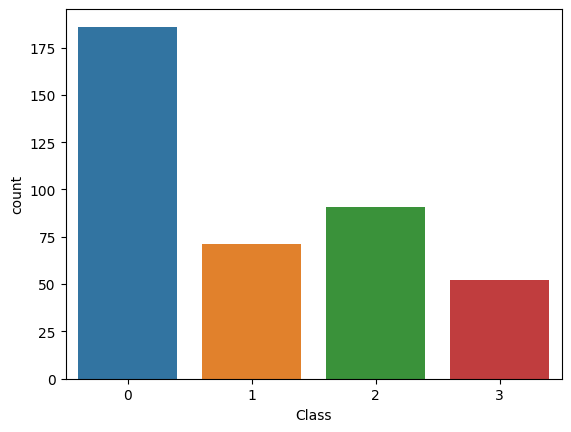

In [ ]:
sns.countplot(df,x='Class')

In [ ]:
X=input_tensor2
y=np.array(fin_ind_list_test)

In [ ]:
X=X/255

In [ ]:
# ut = int(0.8 * len(X))  # 60% for training, 40% for testing
# X_train, X_test = cX[0: cut], X[cut:]
# y_train, y_test = y[0: cut], y[cut:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.30, random_state=20200226,stratify = y)

**bold text**

In [ ]:
y_test1=pd.DataFrame(y_test,columns=['Class'])

<Axes: xlabel='Class', ylabel='count'>

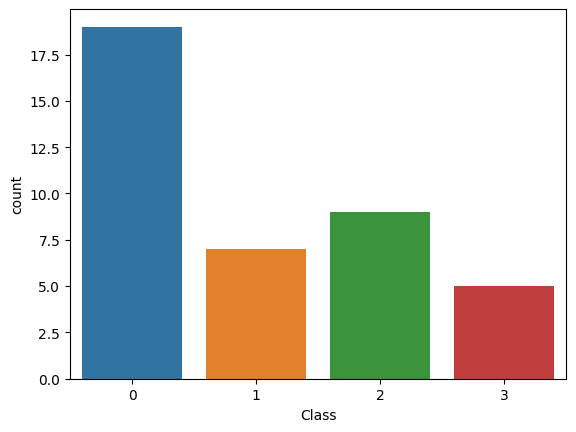

In [ ]:
sns.countplot(y_test1,x='Class')

In [ ]:
X_train.shape

(330, 100, 100, 3)

In [ ]:
y_train

array([4, 4, 4, 4, 0, 2, 0, 2, 2, 3, 2, 2, 2, 0, 3, 2, 2, 4, 0, 0, 1, 3,
       2, 2, 2, 0, 2, 2, 0, 4, 2, 2, 0, 3, 2, 2, 3, 0, 4, 4, 0, 4, 0, 2,
       0, 0, 2, 0, 1, 0, 3, 2, 0, 0, 0, 2, 3, 0, 3, 0, 2, 0, 0, 0, 0, 3,
       2, 2, 0, 2, 0, 0, 0, 2, 3, 4, 2, 4, 3, 4, 0, 0, 3, 2, 4, 2, 0, 4,
       0, 1, 0, 0, 0, 2, 4, 0, 0, 0, 4, 2, 4, 2, 2, 0, 0, 3, 0, 2, 4, 2,
       0, 2, 0, 2, 2, 3, 3, 0, 0, 3, 0, 2, 0, 4, 2, 2, 0, 2, 0, 3, 0, 0,
       1, 4, 0, 2, 2, 3, 3, 2, 2, 4, 2, 3, 3, 1, 3, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 3, 1, 4, 2, 0, 0, 3, 4, 2, 0,
       3, 3, 2, 1, 2, 3, 3, 4, 0, 2, 0, 3, 3, 2, 0, 0, 3, 2, 0, 4, 2, 2,
       3, 4, 0, 2, 2, 3, 2, 0, 2, 4, 0, 0, 3, 0, 0, 0, 0, 3, 2, 2, 4, 2,
       4, 0, 2, 3, 4, 3, 2, 2, 4, 0, 0, 0, 2, 2, 2, 3, 3, 1, 4, 0, 2, 1,
       0, 0, 2, 3, 2, 2, 0, 3, 3, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       4, 3, 2, 4, 0, 3, 0, 2, 2, 4, 0, 1, 2, 4, 0, 4, 0, 0, 3, 2, 2, 0,
       2, 3, 0, 3, 3, 2, 0, 0, 2, 2, 0, 2, 3, 0, 2,

In [ ]:
from keras import optimizers

In [ ]:
def fitness_function(position):
    learning_rate,n1,n2,n3,n4,krnl_size,epochs,_,_,_ = position
    n1,n2,n3,n4,krnl_size,epochs=int(n1),int(n2),int(n3),int(n4),int(krnl_size),int(epochs)
    print(learning_rate,n1,n2,n3,n4,krnl_size,epochs)
    model = Sequential()

    # Initial Convolution Layer
    model.add(Conv2D(n1, (krnl_size, krnl_size), strides=(2, 2), padding='same', input_shape=(100,100,3)))
    model.add(BatchNormalization())
    model.add(ReLU())

    # Depthwise Separable Convolution Blocks
    model.add(DepthwiseConv2D( (krnl_size, krnl_size), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(n2, (3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(DepthwiseConv2D( (krnl_size, krnl_size), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(n3, (3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(DepthwiseConv2D( (krnl_size, krnl_size), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(n4, (3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())

    # Global Average Pooling and Fully Connected Layers
    model.add(GlobalAveragePooling2D())

    # ########
    model.add(Dense(512, activation='relu'))#kernel_regularizer='l1'))
    model.add(Dropout(0.2))
    model.add(Dense(512//2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512//4, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512//8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    # ########
    model.add(Dense(4, activation='softmax'))

    # model.add(Dropout(0.2))
    optimizer = optimizers.Adam(lr=learning_rate)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.02, height_shift_range=0.02, shear_range=0.02, zoom_range=0.02, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100, 100), batch_size=32, class_mode='sparse',classes=['0', '1', '2', '3'])
    validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(100, 100), batch_size=32, class_mode='sparse',classes=['0', '1', '2', '3'])
    history = model.fit(train_generator, steps_per_epoch= len(df_train)//32, epochs=25, validation_data=validation_generator, validation_steps=len(df_valid)//32)
    #history = model.fit(X_train,y_train, epochs=int(epochs),batch_size=32,shuffle=True, validation_data=(X_test, y_test))
    return history.history['val_accuracy'][-1]

# problem_dict1 = {
#     "fit_func": fitness_function,
#     'lb':[0.001,32,64,128,256,3,5,1,1,1], # Lower bound of our parameters
#     'ub':[0.1,64,128,256,512,5,50,1,1,1], # upper bound of our parameters
#     "minmax": "min"
# }

problem_dict1 = {
    "obj_func": fitness_function,
    'bounds': FloatVar(lb=[0.001,32,64,128,256,3,5,1,1,1 ], ub=[0.1,64,128,256,512,5,50,1,1,1 ]),   # Define bounds for each parameter
    "minmax": "min"
}





epoch = 100
pop_size = 10
model = GOA.OriginalGOA(epoch, pop_size, c_min = 0.00004, c_max = 1.0)
best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

0.021733009288169382 54 117 144 261 4 14


Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 46s 4s/step - loss: 1.2958 - accuracy: 0.4448 - val_loss: 1.3474 - val_accuracy: 0.5938
Epoch 2/25
11/11 [==============================] - 40s 4s/step - loss: 1.2442 - accuracy: 0.4318 - val_loss: 1.3191 - val_accuracy: 0.5000
Epoch 3/25
11/11 [==============================] - 44s 4s/step - loss: 1.2395 - accuracy: 0.4507 - val_loss: 1.2998 - val_accuracy: 0.5000
Epoch 4/25
11/11 [==============================] - 39s 3s/step - loss: 1.3082 - accuracy: 0.4119 - val_loss: 1.3438 - val_accuracy: 0.4375
Epoch 5/25
11/11 [==============================] - 40s 4s/step - loss: 1.2575 - accuracy: 0.4744 - val_loss: 1.1858 - val_accuracy: 0.6250
Epoch 6/25
11/11 [==============================] - 39s 4s/step - loss: 1.2423 - accuracy: 0.4537 - val_loss: 1.3041 - val_accuracy: 0.4375
Epoch 7/25
11/11 [==============================] - 43s 4s/step - loss: 1.2559 

INFO:mealpy.swarm_based.GOA.OriginalGOA:Solving single objective optimization problem.


0.07130964826935225 46 81 153 318 4 28


Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 43s 4s/step - loss: 1.3037 - accuracy: 0.3612 - val_loss: 1.3438 - val_accuracy: 0.5000
Epoch 2/25
11/11 [==============================] - 36s 3s/step - loss: 1.2757 - accuracy: 0.4627 - val_loss: 1.3388 - val_accuracy: 0.4688
Epoch 3/25
11/11 [==============================] - 36s 3s/step - loss: 1.2886 - accuracy: 0.4290 - val_loss: 1.3265 - val_accuracy: 0.5000
Epoch 4/25
11/11 [==============================] - 36s 3s/step - loss: 1.2624 - accuracy: 0.4537 - val_loss: 1.2811 - val_accuracy: 0.5938
Epoch 5/25
11/11 [==============================] - 34s 3s/step - loss: 1.2307 - accuracy: 0.4537 - val_loss: 1.2878 - val_accuracy: 0.5000
Epoch 6/25
11/11 [==============================] - 34s 3s/step - loss: 1.2526 - accuracy: 0.4507 - val_loss: 1.2853 - val_accuracy: 0.4062
Epoch 7/25
11/11 [==============================] - 39s 4s/step - loss: 1.2435 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 46s 4s/step - loss: 1.2963 - accuracy: 0.4507 - val_loss: 1.3591 - val_accuracy: 0.4375
Epoch 2/25
11/11 [==============================] - 43s 4s/step - loss: 1.2527 - accuracy: 0.4233 - val_loss: 1.3370 - val_accuracy: 0.4375
Epoch 3/25
11/11 [==============================] - 45s 4s/step - loss: 1.2339 - accuracy: 0.4716 - val_loss: 1.2952 - val_accuracy: 0.5312
Epoch 4/25
11/11 [==============================] - 41s 4s/step - loss: 1.2351 - accuracy: 0.4299 - val_loss: 1.2412 - val_accuracy: 0.5625
Epoch 5/25
11/11 [==============================] - 45s 4s/step - loss: 1.2780 - accuracy: 0.4318 - val_loss: 1.3130 - val_accuracy: 0.4375
Epoch 6/25
11/11 [==============================] - 42s 4s/step - loss: 1.2470 - accuracy: 0.4545 - val_loss: 1.3170 - val_accuracy: 0.4062
Epoch 7/25
11/11 [==============================] - 48s 4s/step - loss: 1.2432 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 57s 5s/step - loss: 1.3259 - accuracy: 0.4091 - val_loss: 1.3576 - val_accuracy: 0.5000
Epoch 2/25
11/11 [==============================] - 51s 4s/step - loss: 1.2736 - accuracy: 0.3940 - val_loss: 1.3465 - val_accuracy: 0.4375
Epoch 3/25
11/11 [==============================] - 53s 5s/step - loss: 1.2785 - accuracy: 0.4489 - val_loss: 1.2941 - val_accuracy: 0.5625
Epoch 4/25
11/11 [==============================] - 52s 5s/step - loss: 1.2349 - accuracy: 0.4418 - val_loss: 1.2663 - val_accuracy: 0.5000
Epoch 5/25
11/11 [==============================] - 52s 4s/step - loss: 1.2588 - accuracy: 0.3881 - val_loss: 1.2790 - val_accuracy: 0.5625
Epoch 6/25
11/11 [==============================] - 57s 5s/step - loss: 1.2373 - accuracy: 0.4830 - val_loss: 1.2099 - val_accuracy: 0.5312
Epoch 7/25
11/11 [==============================] - 53s 5s/step - loss: 1.2664 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 45s 4s/step - loss: 1.3467 - accuracy: 0.3254 - val_loss: 1.3604 - val_accuracy: 0.4688
Epoch 2/25
11/11 [==============================] - 38s 3s/step - loss: 1.2980 - accuracy: 0.4060 - val_loss: 1.3283 - val_accuracy: 0.5000
Epoch 3/25
11/11 [==============================] - 42s 4s/step - loss: 1.2578 - accuracy: 0.4602 - val_loss: 1.3268 - val_accuracy: 0.4375
Epoch 4/25
11/11 [==============================] - 41s 4s/step - loss: 1.2328 - accuracy: 0.4375 - val_loss: 1.2845 - val_accuracy: 0.5312
Epoch 5/25
11/11 [==============================] - 38s 3s/step - loss: 1.2623 - accuracy: 0.4687 - val_loss: 1.2996 - val_accuracy: 0.3750
Epoch 6/25
11/11 [==============================] - 42s 4s/step - loss: 1.2486 - accuracy: 0.4801 - val_loss: 1.3710 - val_accuracy: 0.3125
Epoch 7/25
11/11 [==============================] - 39s 3s/step - loss: 1.2441 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 46s 4s/step - loss: 1.2979 - accuracy: 0.4328 - val_loss: 1.3701 - val_accuracy: 0.3438
Epoch 2/25
11/11 [==============================] - 41s 4s/step - loss: 1.2845 - accuracy: 0.4460 - val_loss: 1.3258 - val_accuracy: 0.4375
Epoch 3/25
11/11 [==============================] - 41s 4s/step - loss: 1.2944 - accuracy: 0.4448 - val_loss: 1.3047 - val_accuracy: 0.4688
Epoch 4/25
11/11 [==============================] - 44s 4s/step - loss: 1.2711 - accuracy: 0.4432 - val_loss: 1.2225 - val_accuracy: 0.5312
Epoch 5/25
11/11 [==============================] - 43s 4s/step - loss: 1.2528 - accuracy: 0.4432 - val_loss: 1.2491 - val_accuracy: 0.4688
Epoch 6/25
11/11 [==============================] - 43s 4s/step - loss: 1.2940 - accuracy: 0.4030 - val_loss: 1.2793 - val_accuracy: 0.5312
Epoch 7/25
11/11 [==============================] - 43s 4s/step - loss: 1.2860 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 51s 4s/step - loss: 1.3207 - accuracy: 0.4119 - val_loss: 1.3631 - val_accuracy: 0.4688
Epoch 2/25
11/11 [==============================] - 43s 4s/step - loss: 1.2806 - accuracy: 0.4149 - val_loss: 1.3439 - val_accuracy: 0.4062
Epoch 3/25
11/11 [==============================] - 45s 4s/step - loss: 1.2767 - accuracy: 0.4233 - val_loss: 1.3154 - val_accuracy: 0.5312
Epoch 4/25
11/11 [==============================] - 44s 4s/step - loss: 1.2242 - accuracy: 0.4290 - val_loss: 1.3389 - val_accuracy: 0.4062
Epoch 5/25
11/11 [==============================] - 41s 4s/step - loss: 1.2511 - accuracy: 0.4478 - val_loss: 1.3291 - val_accuracy: 0.4062
Epoch 6/25
11/11 [==============================] - 45s 4s/step - loss: 1.2826 - accuracy: 0.4176 - val_loss: 1.3261 - val_accuracy: 0.4062
Epoch 7/25
11/11 [==============================] - 41s 4s/step - loss: 1.2803 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 42s 3s/step - loss: 1.2952 - accuracy: 0.4358 - val_loss: 1.3316 - val_accuracy: 0.5625
Epoch 2/25
11/11 [==============================] - 38s 3s/step - loss: 1.2744 - accuracy: 0.3910 - val_loss: 1.3221 - val_accuracy: 0.5312
Epoch 3/25
11/11 [==============================] - 39s 3s/step - loss: 1.2308 - accuracy: 0.4507 - val_loss: 1.3284 - val_accuracy: 0.3750
Epoch 4/25
11/11 [==============================] - 38s 3s/step - loss: 1.2151 - accuracy: 0.4418 - val_loss: 1.2970 - val_accuracy: 0.4375
Epoch 5/25
11/11 [==============================] - 44s 4s/step - loss: 1.2223 - accuracy: 0.4631 - val_loss: 1.3077 - val_accuracy: 0.3750
Epoch 6/25
11/11 [==============================] - 36s 3s/step - loss: 1.2847 - accuracy: 0.4358 - val_loss: 1.3002 - val_accuracy: 0.4688
Epoch 7/25
11/11 [==============================] - 38s 3s/step - loss: 1.2645 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 55s 4s/step - loss: 1.3205 - accuracy: 0.4233 - val_loss: 1.3709 - val_accuracy: 0.4375
Epoch 2/25
11/11 [==============================] - 51s 5s/step - loss: 1.2613 - accuracy: 0.4659 - val_loss: 1.3507 - val_accuracy: 0.4062
Epoch 3/25
11/11 [==============================] - 54s 5s/step - loss: 1.2389 - accuracy: 0.4659 - val_loss: 1.3051 - val_accuracy: 0.5312
Epoch 4/25
11/11 [==============================] - 50s 5s/step - loss: 1.2850 - accuracy: 0.4091 - val_loss: 1.2979 - val_accuracy: 0.5000
Epoch 5/25
11/11 [==============================] - 49s 4s/step - loss: 1.2545 - accuracy: 0.4358 - val_loss: 1.2732 - val_accuracy: 0.5000
Epoch 6/25
11/11 [==============================] - 47s 4s/step - loss: 1.2134 - accuracy: 0.4478 - val_loss: 1.2661 - val_accuracy: 0.4688
Epoch 7/25
11/11 [==============================] - 51s 5s/step - loss: 1.2690 

Found 591 images belonging to 4 classes.
Found 66 images belonging to 4 classes.
Epoch 1/25
11/11 [==============================] - 47s 4s/step - loss: 1.3195 - accuracy: 0.3920 - val_loss: 1.3672 - val_accuracy: 0.3750
Epoch 2/25
11/11 [==============================] - 40s 4s/step - loss: 1.3033 - accuracy: 0.3940 - val_loss: 1.3545 - val_accuracy: 0.4375
Epoch 3/25
11/11 [==============================] - 44s 4s/step - loss: 1.2557 - accuracy: 0.4375 - val_loss: 1.2660 - val_accuracy: 0.5312
Epoch 4/25
11/11 [==============================] - 40s 4s/step - loss: 1.2788 - accuracy: 0.4179 - val_loss: 1.3191 - val_accuracy: 0.4375
Epoch 5/25
11/11 [==============================] - 42s 4s/step - loss: 1.2750 - accuracy: 0.4328 - val_loss: 1.3106 - val_accuracy: 0.4375
Epoch 6/25
11/11 [==============================] - 42s 4s/step - loss: 1.2547 - accuracy: 0.4631 - val_loss: 1.2681 - val_accuracy: 0.4688
Epoch 7/25
11/11 [==============================] - 46s 4s/step - loss: 1.2852 

UnknownError: ignored

On E6063 Dataset

In [ ]:
import os
filename = os.listdir(data)

In [ ]:
print(filename)

['Annotation Base21.xls', '20051216_43814_0200_PP.tif', '20051216_44221_0200_PP.tif', '20051216_44092_0200_PP.tif', '20051216_44066_0200_PP.tif', '20051216_43913_0200_PP.tif', '20051216_44252_0200_PP.tif', '20051216_44420_0200_PP.tif', '20051216_44398_0200_PP.tif', '20051216_44811_0200_PP.tif', '20051216_44660_0200_PP.tif', '20051216_44635_0200_PP.tif', '20051216_45076_0200_PP.tif', '20051216_44961_0200_PP.tif', '20051216_44939_0200_PP.tif', '20051216_44832_0200_PP.tif', '20051216_45245_0200_PP.tif', '20051216_45226_0200_PP.tif', '20051216_45100_0200_PP.tif', '20051216_45375_0200_PP.tif', '20051216_45351_0200_PP.tif', '20051216_45499_0200_PP.tif', '20051216_45478_0200_PP.tif', '20051216_45595_0200_PP.tif', '20051216_45757_0200_PP.tif', '20051216_45619_0200_PP.tif', '20051216_45899_0200_PP.tif', '20051216_45873_0200_PP.tif', '20051216_45781_0200_PP.tif', '20051216_46183_0200_PP.tif', '20051216_46156_0200_PP.tif', '20051216_46018_0200_PP.tif', '20051216_45992_0200_PP.tif', '20051216_4662

In [ ]:
df1=pd.read_excel("/content/drive/MyDrive/E3063 dataset/Annotation_Base21.xls")

In [ ]:
df1

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
0,20051216_43814_0200_PP.tif,CHU de St Etienne,0,0
1,20051216_43913_0200_PP.tif,CHU de St Etienne,0,0
2,20051216_44066_0200_PP.tif,CHU de St Etienne,0,0
3,20051216_44092_0200_PP.tif,CHU de St Etienne,0,0
4,20051216_44221_0200_PP.tif,CHU de St Etienne,0,0
...,...,...,...,...
95,20060407_44510_0200_PP.tif,CHU de St Etienne,0,0
96,20060407_44529_0200_PP.tif,CHU de St Etienne,0,0
97,20060407_44617_0200_PP.tif,CHU de St Etienne,3,2
98,20060407_44636_0200_PP.tif,CHU de St Etienne,3,2


In [ ]:
df2=pd.read_excel("/content/drive/MyDrive/E3063 dataset/Annotation_Base22.xls")
df3=pd.read_excel("/content/drive/MyDrive/E3063 dataset/Annotation_Base23.xls")
df4=pd.read_excel("/content/drive/MyDrive/E3063 dataset/Annotation_Base24.xls")

In [ ]:
print(df2.columns)

Index(['Image name', 'Ophthalmologic department', 'Retinopathy grade',
       'Risk of macular edema '],
      dtype='object')


In [ ]:
merge_df=pd.merge(df1,df2,on=['Image name','Retinopathy grade'],how='outer')

In [ ]:
merge_df=pd.merge(merge_df,df3,on=['Image name','Retinopathy grade'],how='outer')

In [ ]:
merge_df=pd.merge(merge_df,df4,on=['Image name','Retinopathy grade'],how='outer')

<ipython-input-78-82f752b45944>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Risk of macular edema _x', 'Ophthalmologic department_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_df=pd.merge(merge_df,df4,on=['Image name','Retinopathy grade'],how='outer')


In [ ]:
merge_df

,Image name,Ophthalmologic department_x,Retinopathy grade,Risk of macular edema _x,Ophthalmologic department_y,Risk of macular edema _y,Ophthalmologic department_x,Risk of macular edema _x,Ophthalmologic department_y,Risk of macular edema _y
0,20051216_43814_0200_PP.tif,CHU de St Etienne,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20051216_43913_0200_PP.tif,CHU de St Etienne,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,20051216_44066_0200_PP.tif,CHU de St Etienne,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20051216_44092_0200_PP.tif,CHU de St Etienne,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20051216_44221_0200_PP.tif,CHU de St Etienne,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
395,20060412_62960_0200_PP.tif,NaN,3,NaN,NaN,NaN,NaN,NaN,CHU de St Etienne,2.0
396,20060412_63009_0200_PP.tif,NaN,1,NaN,NaN,NaN,NaN,NaN,CHU de St Etienne,0.0
397,20060412_63032_0200_PP.tif,NaN,1,NaN,NaN,NaN,NaN,NaN,CHU de St Etienne,0.0
398,20060412_63088_0200_PP.tif,NaN,1,NaN,NaN,NaN,NaN,NaN,CHU de St Etienne,0.0


In [ ]:
final_df['Image name'][200]

'20060411_57879_0200_PP.tif'

In [ ]:
df3['Image name'][0]

'20060411_57879_0200_PP.tif'

In [ ]:
final_df=merge_df[['Image name','Retinopathy grade']].copy()

In [ ]:
final_df

,Image name,Retinopathy grade
0,20051216_43814_0200_PP.tif,0
1,20051216_43913_0200_PP.tif,0
2,20051216_44066_0200_PP.tif,0
3,20051216_44092_0200_PP.tif,0
4,20051216_44221_0200_PP.tif,0
...,...,...
395,20060412_62960_0200_PP.tif,3
396,20060412_63009_0200_PP.tif,1
397,20060412_63032_0200_PP.tif,1
398,20060412_63088_0200_PP.tif,1


In [ ]:
final_df.to_csv('/content/drive/MyDrive/final_df.csv')

<Axes: xlabel='Retinopathy grade', ylabel='count'>

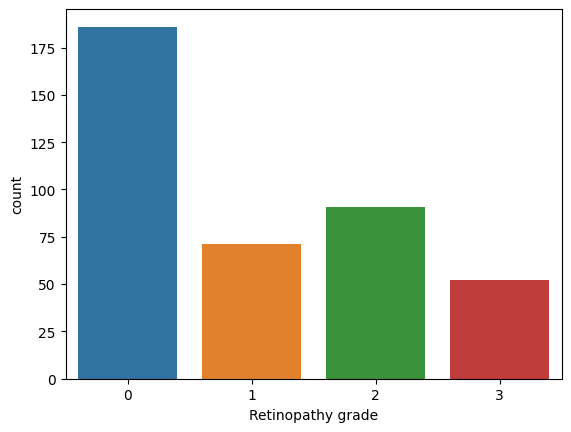

In [ ]:
sns.countplot(final_df,x='Retinopathy grade')

In [ ]:
data="/content/drive/MyDrive/E3063 dataset/Base24"

In [ ]:
i=0

for img in os.listdir(data):
    if img.endswith(".tif"):
      # print(img)
      image=cv2.imread(data+'/'+img)

      images=cv2.medianBlur(image,7)
      #images = cv2.resize(images, (SIZE, SIZE))
      image_bw = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)

      # The declaration of CLAHE
      # clipLimit -> Threshold for contrast limiting
      clahe = cv2.createCLAHE(clipLimit=5)
      final_img = clahe.apply(image_bw) + 30
      cv2.imwrite(f"/content/drive/MyDrive/E6063_processed_4/{img}.jpg",final_img)

    #train_images.append(final_img)





In [ ]:
image

NameError: ignored